# Content List

### 1. Importing libraries
### 2. Comparing demographic behavior
### 3. Excluding low-activity customers
### 4. Creating marketing profiles
### 5. Visualizations
### 6. Aggregating mean, max, min for customer profiles

# Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing data set

In [2]:
path = r"C:\Users\cavba\Documents\Instacart Basket Analysis"

In [4]:
ic_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

In [5]:
ic_data.head()

,user_id,First Name,LastName,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest day,Result,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regular busy,slowest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer


In [6]:
#Checking the shape of imported full dataset
ic_data.shape

(18339472, 35)

In [7]:
ic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18339472 entries, 0 to 18339471
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   First Name              object 
 2   LastName                object 
 3   Gender                  object 
 4   STATE                   object 
 5   Age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   family_status           object 
 9   income                  int64  
 10  Unnamed: 0              int64  
 11  product_id              int64  
 12  product_name            object 
 13  aisle_id                int64  
 14  department_id           int64  
 15  prices                  float64
 16  order_id                int64  
 17  eval_set                object 
 18  order_number            int64  
 19  orders_day_of_the_week  int64  
 20  order_hour_of_day       int64  
 21  days_since_prior_order  float

In [8]:
#Checking data for missing values
ic_data.isnull().sum()

user_id                         0
First Name                      0
LastName                        0
Gender                          0
STATE                           0
Age                             0
date_joined                     0
number_of_dependants            0
family_status                   0
income                          0
Unnamed: 0                      0
product_id                      0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
order_id                        0
eval_set                        0
order_number                    0
orders_day_of_the_week          0
order_hour_of_day               0
days_since_prior_order    1170531
add_to_cart_order               0
reordered                       0
_merge                          0
price_range_loc                 0
busiest day                     0
Result                          0
busiest_period_of_day           0
max_order     

Missing data for "days_since_prior_order" is not an issue because that means customers ordered on the day the data was collected.  

### Step 2: PII Considerations

Customer first and last names will need to be scrubbed from the final data set for privacy reasons

In [13]:
#removing customer first and last names for PII security and removing unnecessary columns
ic_data_1 = ic_data.drop(columns = ['First Name', 'LastName', 'eval_set', 'Unnamed: 0', '_merge'])

In [14]:
ic_data_1.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,price_range_loc,busiest day,Result,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regular busy,slowest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer


In [15]:
ic_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18339472 entries, 0 to 18339471
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   Gender                  object 
 2   STATE                   object 
 3   Age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   family_status           object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_the_week  int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_range_loc         object 
 21  busiest day             objec

## 3.2 Comparing behavior in deomgraphic regions

In [16]:
#Creating region column based on states
def region_label(row):

  if row['STATE'] in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
    return 'Northeast'
  elif row['STATE'] in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
    return 'Midwest'
  elif row['STATE'] in ('Delaware', 'Maryland', 'Virginia', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
    return 'South'
  elif row['STATE'] in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
    return 'West'
  else: return 'State Unlisted'

In [17]:
# Applying region variable to subset
ic_data_1['region'] = ic_data_1.apply(region_label, axis =1)

In [18]:
ic_data_1.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,busiest day,Result,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order,frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regular busy,busiest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular busy,regular days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regular busy,slowest days,Most orders,8,New customer,5.111111,Low Spender,19.0,Regular Customer,Midwest


In [19]:
#Checking the frequency of regions
ic_data_1['region'].value_counts(dropna = False)

South        6106268
West         4691669
Midwest      4295629
Northeast    3245906
Name: region, dtype: int64

The South has the highest number of instacart customers. 

In [20]:
#Determining spending habits in each region
ic_data_1.groupby(['region'])['spending_flag'].value_counts()

region     spending_flag
Midwest    High Spender     2677947
           Low Spender      1617682
Northeast  High Spender     2054383
           Low Spender      1191523
South      High Spender     3841327
           Low Spender      2264941
West       High Spender     2956840
           Low Spender      1734829
Name: spending_flag, dtype: int64

In [21]:
crosstab = pd.crosstab(ic_data_1['region'], ic_data_1['spending_flag'], dropna = False)

In [22]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,2677947,1617682
Northeast,2054383,1191523
South,3841327,2264941
West,2956840,1734829


## Step 4: Exclusion flag for low-activity customers

In [23]:
ic_data_1.shape

(18339472, 31)

In [24]:
#Creating a subset with low activity customers only
df_low_activity = ic_data_1[ic_data_1['max_order']<5]

In [25]:
df_low_activity.shape

(808135, 31)

In [26]:
#Creating a subset excluding low activity customers
df_active = ic_data_1[ic_data_1['max_order'] > 5]

In [27]:
df_active.shape

(17085443, 31)

In [28]:
#exporting data set to Prepared Data folder
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_active_customers.pkl'))

## Step 5: Marketing profile

In [29]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085443 entries, 0 to 18339448
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   Gender                  object 
 2   STATE                   object 
 3   Age                     int64  
 4   date_joined             object 
 5   number_of_dependants    int64  
 6   family_status           object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  order_id                int64  
 14  order_number            int64  
 15  orders_day_of_the_week  int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  price_range_loc         object 
 21  busiest day             objec

In [30]:
#importing departments table to reference for profiling variables
df_dept=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

In [31]:
df_dept

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [32]:
df_active['family_status'].value_counts(dropna = False)

married                             11997596
single                               2800710
divorced/widowed                     1465754
living with parents and siblings      821383
Name: family_status, dtype: int64

In [33]:
df_active['number_of_dependants'].value_counts(dropna = False)

3    4285727
2    4268722
0    4266464
1    4264530
Name: number_of_dependants, dtype: int64

In [34]:
df_active['department_id'].value_counts(dropna = False)

4     5055112
16    2828727
19    1486018
7     1386797
1     1213468
13     941834
3      653427
15     617015
20     542800
9      431297
12     419443
17     372259
14     335410
11     239961
18     215234
6      151785
5       69656
8       52972
21      32128
10      24296
2       15804
Name: department_id, dtype: int64

## Creating customer profiles

In [35]:
#Creating single adult profile
df_active.loc[(df_active['family_status']== 'single') & (df_active['number_of_dependants']== 0), 'customer_profile'] = 'Single adult'

C:\Users\cavba\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\cavba\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [36]:
#Creating young parent profile
df_active.loc[(df_active['Age']<=30) & (df_active['number_of_dependants'] > 0), 'customer_profile'] = 'Young parent'

C:\Users\cavba\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [37]:
#Creating married with children profile
df_active.loc[(df_active['family_status'] =='married')  & (df_active['number_of_dependants'] >= 1), 'customer_profile'] = 'Married with children'

C:\Users\cavba\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [38]:
#Creating married without children profile
df_active.loc[(df_active['family_status'] =='married')  & (df_active['number_of_dependants'] == 0), 'customer_profile'] = 'Married no children'

C:\Users\cavba\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [39]:
#Creating other single adult profile
df_active.loc[(df_active['family_status'] =='divorced/widowed') & (df_active['Age'] > 30) & (df_active['number_of_dependants'] == 0), 'customer_profile'] = 'Other single adult'

C:\Users\cavba\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [40]:
#Creating lives with relatives profile
df_active.loc[(df_active['family_status'] =='living with parents and siblings'), 'customer_profile'] = 'Lives with relatives'

In [41]:
df_active['customer_profile'].value_counts()

Married with children    11997596
Single adult              2800710
Other single adult        1465754
Lives with relatives       821383
Name: customer_profile, dtype: int64

## Step 6: Visualization for customer profile

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Married with children'),
  Text(1, 0, 'Single adult'),
  Text(2, 0, 'Other single adult'),
  Text(3, 0, 'Lives with relatives')])

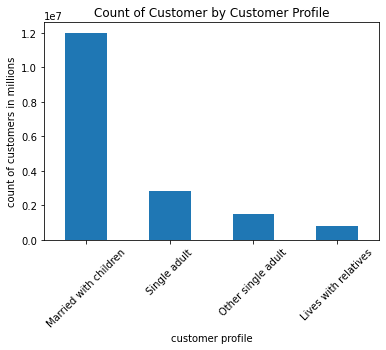

In [43]:
customer_profile_bar = df_active['customer_profile'].value_counts().plot.bar()
plt.title('Count of Customer by Customer Profile')
plt.ylabel('count of customers in millions')
plt.xlabel('customer profile')
plt.xticks(rotation = 45)

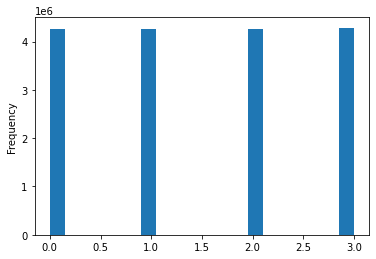

In [45]:
dependants_hist = df_active['number_of_dependants'].plot.hist(bins = 20)

Number of dependants doesn't vary enough for the chart above to be useful

Text(0.5, 0, 'income')

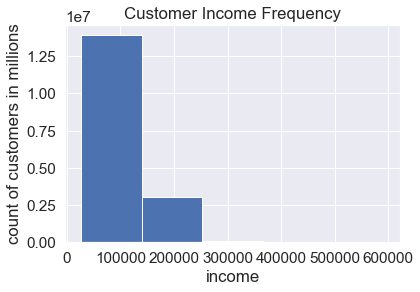

In [58]:
income_hist = df_active['income'].plot.hist(bins=5)
plt.title('Customer Income Frequency')
plt.ylabel('count of customers in millions')
plt.xlabel('income')

In [59]:
len(df_active)

17085443

In [60]:
dev = np.random.rand(len(df_active)) <= 0.7

In [61]:
#Store 70% of active customer data in dataframe big
big = df_active[dev]

In [62]:
#Store 30% of active customer data in dataframe small
small = df_active[~dev]

In [63]:
len(big) + len(small)

17085443

In [64]:
df_2 = small[['Age', 'income']]

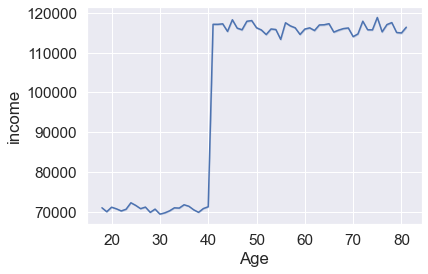

In [66]:
# Relationship between customer ages and income
l1 = sns.lineplot(data = df_active, x = 'Age',y = 'income')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

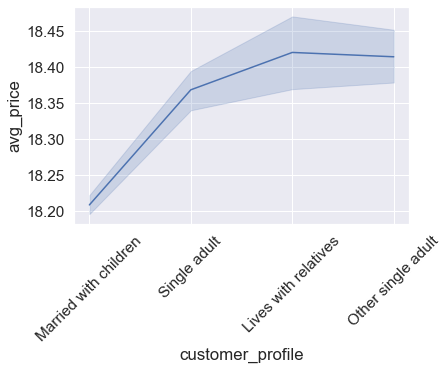

In [70]:
# Average order price for each customer profile
profile_line = sns.lineplot(x = 'customer_profile', y = 'avg_price', data = small)
plt.xticks(rotation = 45)

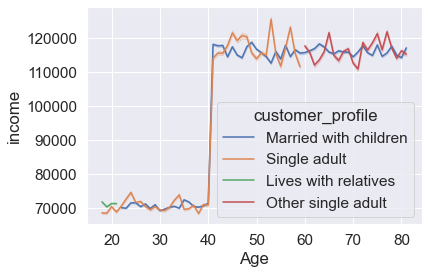

In [71]:
#Comparing customer profile ages and incomes
l2 = sns.lineplot(data = small, x = 'Age',y = 'income', hue ='customer_profile')

It's odd that there is a drastic spike in incomes at 40 years old

In [74]:
df_active.value_counts(['Age'])

Age
79     280108
48     279266
31     278413
73     278290
68     278130
        ...  
60     253888
65     253387
66     250248
41     247692
25     246036
Length: 64, dtype: int64

<AxesSubplot:ylabel='Frequency'>

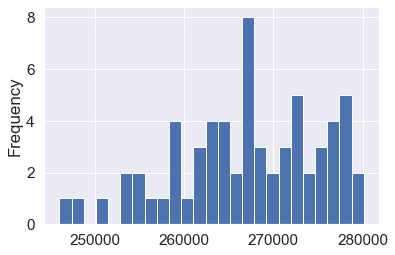

In [77]:
df_active.value_counts(['Age']).plot.hist(bins = 25)

In [82]:
df_4 = small[['Age', 'income']]

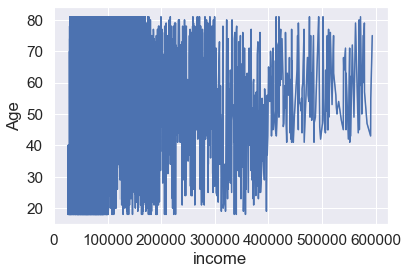

In [83]:
l4 = sns.lineplot(data = df_4, x = 'income',y = 'Age')

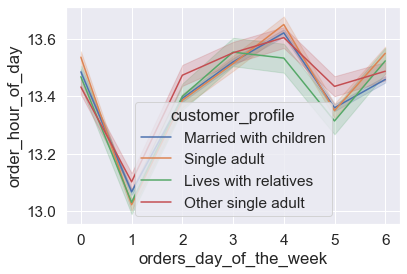

In [84]:
#Plotting busiest days and hours of the day
l3 = sns.lineplot(data = small, x = 'orders_day_of_the_week',y = 'order_hour_of_day', hue ='customer_profile')

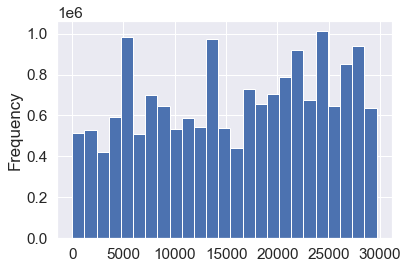

In [85]:
product_orders =  df_active['product_id'].plot.hist(bins=25)

### Exporting visualizations

In [101]:
customer_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_barchart.png'))

In [102]:
dependants_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_histogram.png'))

In [103]:
l1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_line_trend.png'))

In [104]:
profile_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_avg_price.png'))

In [106]:
l2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_income_trend.png'))

In [107]:
l3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dayS_hours_orders.png'))

## Step 7: Aggregating max, mean, and min variables

In [108]:
income_by_profile = df_active.groupby('customer_profile').agg({'income':['mean','max','min']})

In [109]:
income_by_profile

income               
                                mean     max    min
customer_profile                                   
Lives with relatives    71117.971083  396364  25972
Married with children  101631.036413  593901  25911
Other single adult     116180.415997  578251  29011
Single adult            91723.076028  584097  25903

In [110]:
frequency_by_profile = df_active.groupby('customer_profile').agg({'order_number':['mean', 'max', 'min']})

In [111]:
frequency_by_profile

order_number        
                              mean max min
customer_profile                          
Lives with relatives     18.363546  99   1
Married with children    18.144085  99   1
Other single adult       18.372609  99   1
Single adult             18.314125  99   1

In [112]:
profile_expenditure = df_active.groupby('customer_profile').agg({'median_order': ['mean', 'max', 'min']})

In [113]:
profile_expenditure

median_order           
                              mean   max  min
customer_profile                             
Lives with relatives      9.629408  30.0  0.0
Married with children     9.732427  30.0  0.0
Other single adult        9.605858  30.0  0.0
Single adult              9.727109  30.0  0.0

## Step 8: Comparing customer profiles with regions and departments

In [114]:
avg_price_by_profile = df_active.groupby('customer_profile').agg({'avg_price' : ['mean', 'max', 'min']})

In [115]:
avg_price_by_profile

avg_price                     
                            mean        max       min
customer_profile                                     
Lives with relatives   18.363546  62.137119  2.250000
Married with children  18.144085  64.688974  1.673684
Other single adult     18.372609  58.029096  2.212121
Single adult           18.314125  62.426856  1.956522

In [118]:
order_frequency_region = df_active.groupby('region').agg({'order_number': ['mean', 'max', 'min']})

In [119]:
order_frequency_region

order_number        
                  mean max min
region                        
Midwest      17.987101  99   1
Northeast    18.344143  99   1
South        18.176992  99   1
West         18.333438  99   1

In [120]:
avg_price_by_region = df_active.groupby('region').agg({'avg_price': ['mean', 'max', 'min']})

In [121]:
avg_price_by_region

avg_price                     
                mean        max       min
region                                   
Midwest    17.987101  59.603261  2.133333
Northeast  18.344143  62.426856  1.673684
South      18.176992  60.538371  1.830189
West       18.333438  64.688974  1.956522

TypeError: 'AxesSubplot' object is not callable

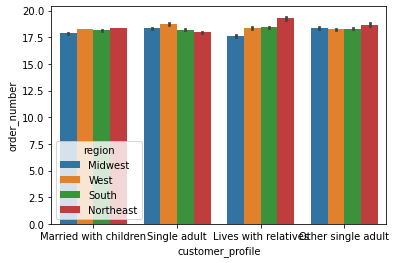

In [137]:
frequency_bar = sns.barplot(x ='customer_profile', y = 'order_number', hue = 'region',data =small)(figsize=(30,20))

In [124]:
#exporting chart
frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_order_freq.png'))